In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature

In [4]:
def component_histograms(image):
    """ Computes histograms of each component of each pixel                     
    Parameters:                                                                 
    - image : A 3-dimensional array                                             
    Returns:                                                                    
    List of histograms with 256 bins for each component of last dimension       
    """
    shape = image.shape
    assert len(shape) == 3
    _, _, num_comp = shape
    components = [image[:, :, [idx]] for idx in xrange(0, num_comp)]
    return [np.histogram(component[component > 0], 256)
            for component in components]

In [5]:
def plot_histogram(hist_data, bins):
    center = (bins[:-1] + bins[1:]) / 2
    fig, ax = plt.subplots()
    width = 0.7 * (bins[1] - bins[0])
    ax.bar(center, hist_data, align='center', width=width)

In [6]:
filename = "../sample/sample/10_left.jpeg"
image = io.imread(filename)
gray_image = color.rgb2gray(image)
hsv_image = color.rgb2hsv(image)

In [8]:
print image.shape
print gray_image.shape

(3168, 4752, 3)
(3168, 4752)


Only displaying values greater than 0 because the raw images are dominated by black.

In [12]:
gray_hist, gray_bins = np.histogram(gray_image[gray_image > 0], 256)
rgb_hists = component_histograms(image)
hsv_hists = component_histograms(hsv_image)

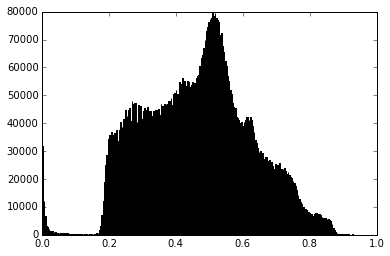

In [23]:
plot_histogram(gray_hist, gray_bins)

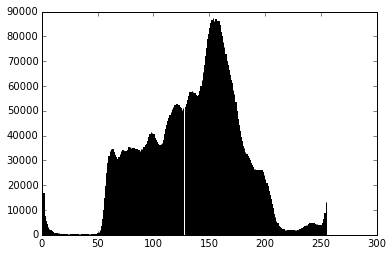

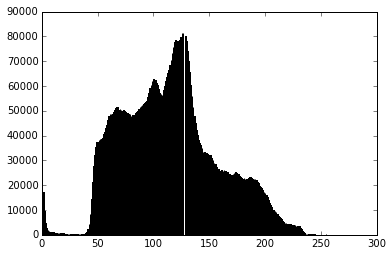

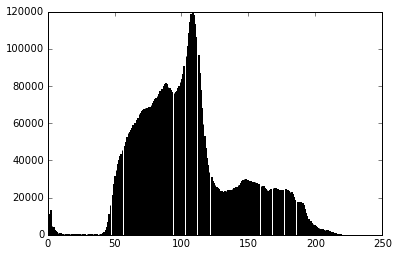

In [42]:
for img_hist, bins in rgb_hists:
    plot_histogram(img_hist, bins)

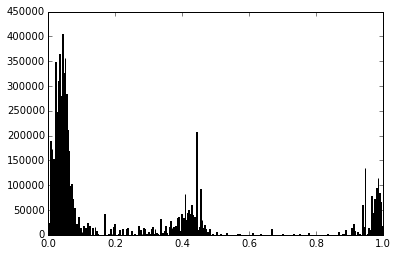

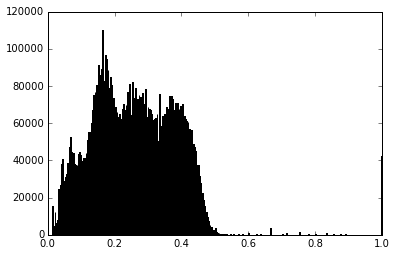

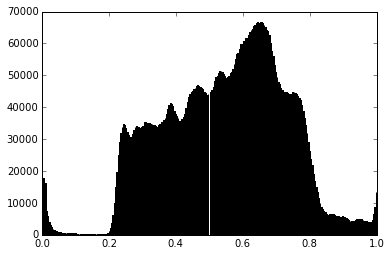

In [46]:
for img_hist, bins in hsv_hists:
    plot_histogram(img_hist, bins)